# __**NORTHWIND DATABASE ANALYSIS**__

¨
 
## > 00. LIBRARIES IMPORTATIONS

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

¨
  
## > 00. FUNCTIONS

In [2]:
def conn_db( query, columns ):
    with sqlite3.connect("C:/Program Files/DB Browser for SQLite/databases/Northwind.db") as conn:
        
        cursor = conn.cursor()
        cursor.execute( query )
        results = cursor.fetchall()
        df = pd.DataFrame( results, columns=columns )
    
    return df

¨
 ## > 01. MOST SOLD PRODUCT


==[ MOST SOLD PRODUCTS (TOP 10) ]==
+---+-----------+----------------------+--------------------+-------+-------------------+---------------+
|   | ProductID |     ProductName      |        Unit        | Price | TotalSoldProducts | TotalEarnings |
+---+-----------+----------------------+--------------------+-------+-------------------+---------------+
| 0 |    31     |  Gorgonzola Telino   |  12 - 100 g pkgs   | 12.5  |        458        |    5725.0     |
| 1 |    60     |  Camembert Pierrot   | 15 - 300 g rounds  | 34.0  |        430        |    14620.0    |
| 2 |    35     |    Steeleye Stout    | 24 - 12 oz bottles | 18.0  |        369        |    6642.0     |
| 3 |    59     | Raclette Courdavault |     5 kg pkg.      | 55.0  |        346        |    19030.0    |
| 4 |     2     |        Chang         | 24 - 12 oz bottles | 19.0  |        341        |    6479.0     |
| 5 |    16     |       Pavlova        |  32 - 500 g boxes  | 17.45 |        338        |    5898.1     |
| 6 |    

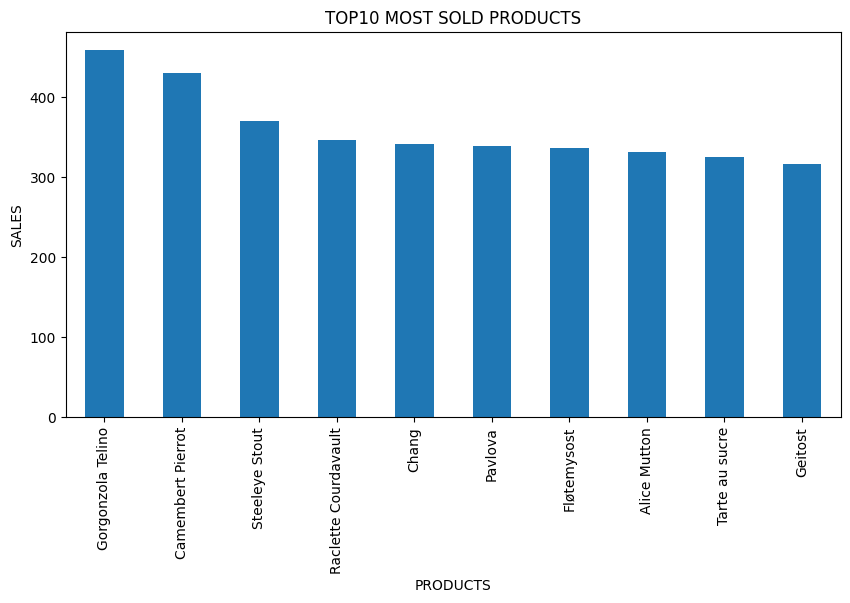

In [8]:
topSoldProduct = conn_db( query = ''' 
                                      SELECT  p.ProductID, p.ProductName, p.Unit, p.Price, 
		                                      SUM( od.Quantity ) AS TotalSoldProducts,
		                                      ROUND( SUM( od.Quantity ) * p.Price, 2 ) AS TotalEarnings
                                      FROM [Products] p
                                      JOIN [OrderDetails] od ON p.ProductID = od.ProductID
                                      GROUP BY ProductName
                                      ORDER BY TotalSoldProducts DESC 
                                      LIMIT 10 
                                  ''',
                                  
                          columns = [ 'ProductID', 'ProductName', 'Unit', 'Price', 'TotalSoldProducts', 'TotalEarnings' ] ) 

print("\n==[ MOST SOLD PRODUCTS (TOP 10) ]==")
print( tabulate( topSoldProduct, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
topSoldProduct.plot( x = "ProductName", y = "TotalSoldProducts",
                     kind = "bar", figsize = ( 10, 5 ), legend = False )
plt.title( "TOP10 MOST SOLD PRODUCTS" )
plt.xlabel( "PRODUCTS" )
plt.ylabel( "SALES" )
plt.xticks( rotation = 90 )
plt.show()

¨
 ## > 02. MOST USED SUPPLIERS


==[ MOST USED SUPPLIERS ]==
+----+----------------------------------------+---------------+-------------+----------+
|    |                SUPPLIER                |     CITY      |   COUNTRY   | PRODUCTS |
+----+----------------------------------------+---------------+-------------+----------+
| 0  |   Plutzer Lebensmittelgroßmärkte AG    |   Frankfurt   |   Germany   |    5     |
| 1  |             Pavlova, Ltd.              |   Melbourne   |  Australia  |    5     |
| 2  |        Specialty Biscuits, Ltd.        |  Manchester   |     UK      |    4     |
| 3  |       New Orleans Cajun Delights       |  New Orleans  |     USA     |    4     |
| 4  |              G'day, Mate               |    Sydney     |  Australia  |    3     |
| 5  |               Karkki Oy                | Lappeenranta  |   Finland   |    3     |
| 6  |              Leka Trading              |   Singapore   |  Singapore  |    3     |
| 7  |           Svensk Sjöföda AB            |   Stockholm   |   Sweden    |    

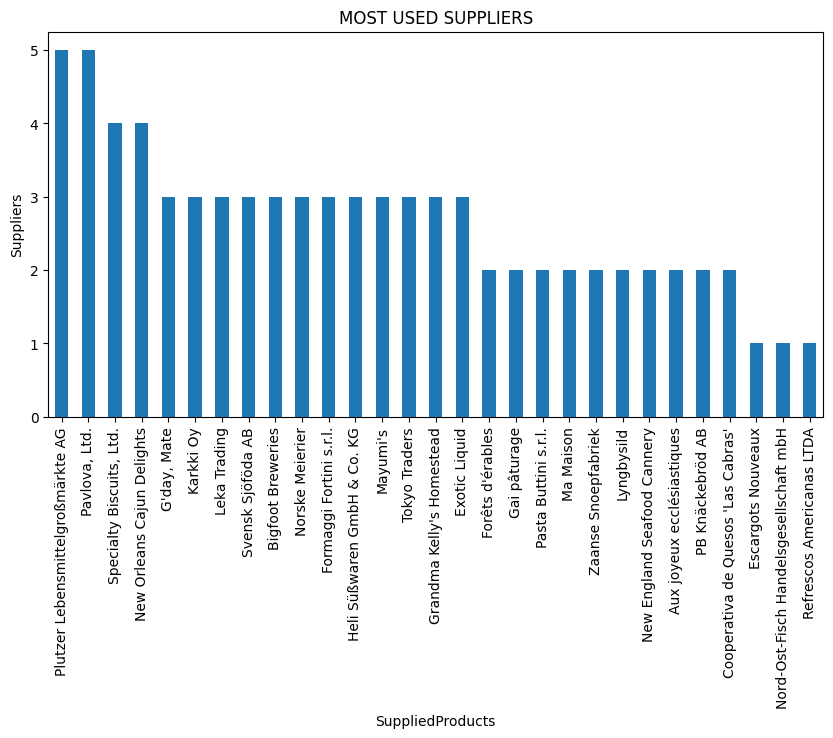

In [9]:
topUsedSuppliers = conn_db( query = '''
                                        SELECT  s.SupplierName, s.City, s.Country, 
                                                COUNT(s.SupplierID) AS SuppliedProducts
                                        FROM [Suppliers] s
                                        JOIN [Products] p ON s.SupplierID = p.SupplierID
                                        GROUP BY s.SupplierID
                                        ORDER BY SuppliedProducts DESC
                                    ''',
                                    
                            columns = [ 'SUPPLIER', 'CITY', 'COUNTRY', 'PRODUCTS' ] )

print("\n==[ MOST USED SUPPLIERS ]==")
print( tabulate( topUsedSuppliers, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
topUsedSuppliers.plot( x = "SUPPLIER", y = "PRODUCTS", kind = "bar",
                       figsize = ( 10, 5 ), legend = False )
plt.title( "MOST USED SUPPLIERS" )
plt.xlabel( "SuppliedProducts" )
plt.ylabel( "Suppliers" )
plt.xticks( rotation = 90 )
plt.show()

¨
 ## > 03. MOST PROFITABLE SUPPLIER ACCORDING TO LOCATION

+----+----------------+----------------------------------------+---------------+-------------+----------+
|    |    LOCATION    |                SUPPLIER                |     CITY      |   COUNTRY   | REVENUES |
+----+----------------+----------------------------------------+---------------+-------------+----------+
| 0  |    America     |            Forêts d'érables            | Ste-Hyacinthe |   Canada    | 19043.5  |
| 1  |    America     |       New Orleans Cajun Delights       |  New Orleans  |     USA     | 10321.9  |
| 2  |    America     |           Bigfoot Breweries            |     Bend      |     USA     |  8252.0  |
| 3  |    America     |               Ma Maison                |   Montréal    |   Canada    |  7798.0  |
| 4  |    America     |       Grandma Kelly's Homestead        |   Ann Arbor   |     USA     |  7250.0  |
| 5  |    America     |      New England Seafood Cannery       |    Boston     |     USA     | 6051.75  |
| 6  |    America     |       Refrescos Americ

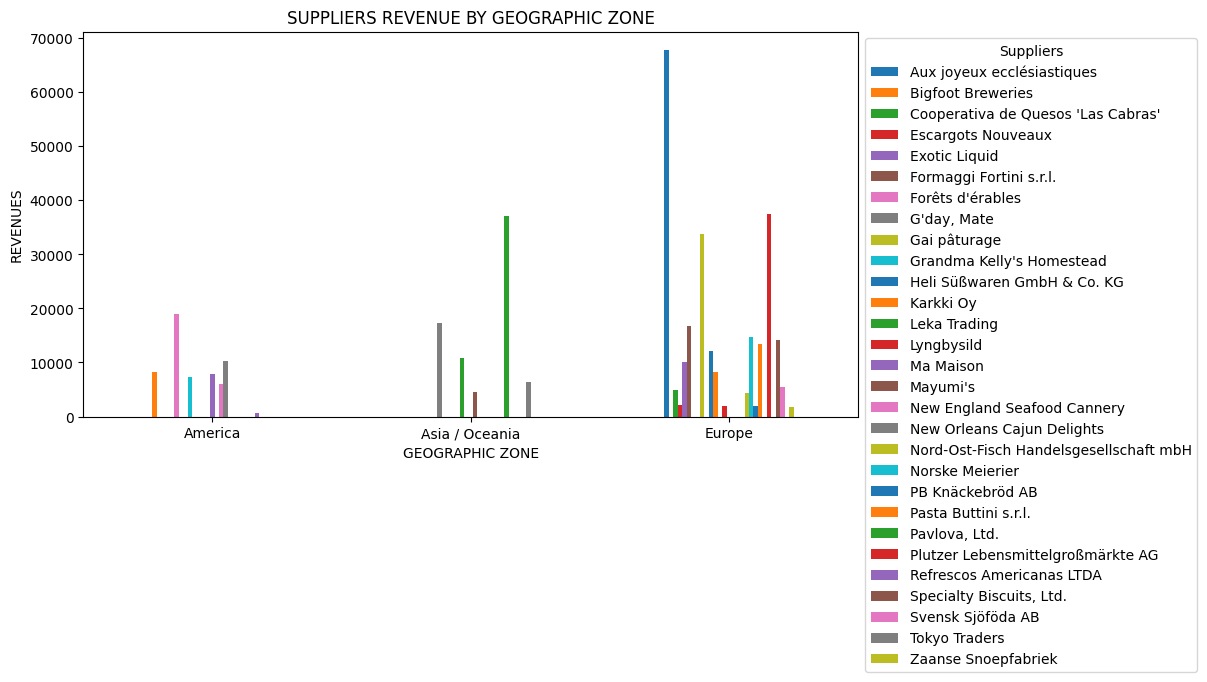

In [10]:
mostProfitSupplier = conn_db( query = '''
                                        SELECT  CASE
                                                        WHEN Country IN ( 'USA', 'Brazil', 'Canada' ) 
                                                                THEN 'America'
                                        			WHEN Country IN ( 'UK', 'Spain', 'Sweden', 'Germany', 'Italy', 'Norway', 
                                                                      'France', 'Denmark', 'Netherlands', 'Finland' ) 
                                                                THEN 'Europe'
                                        			WHEN Country IN ( 'Japan', 'Australia', 'Singapore' ) 
                                                                THEN 'Asia / Oceania'
                                        		END AS Location,
                                        
                                        		SupplierName, s.City, s.Country,
                                        		ROUND( SUM( Price * Quantity ), 2 ) AS Revenues
                                        
                                        FROM [OrderDetails] od
                                        JOIN [Products] p 
                                            ON od.ProductID = p.ProductID
                                        JOIN [Suppliers] s 
                                            ON p.SupplierID = s.SupplierID 
                                        
                                        GROUP BY Location, s.SupplierID
                                        ORDER BY Location, Revenues DESC        
                                      ''',
                                      
                              columns = [ 'LOCATION', 'SUPPLIER', 'CITY', 'COUNTRY', 'REVENUES' ]    )

print( tabulate( mostProfitSupplier, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB (pivot_table)
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
p_table = mostProfitSupplier.pivot_table( index = "LOCATION", columns = "SUPPLIER", values = "REVENUES", 
                          aggfunc = "sum", fill_value = None )
p_table.plot( kind = "bar", figsize = ( 10, 5 ) )

plt.title( "SUPPLIERS REVENUE BY GEOGRAPHIC ZONE" )
plt.xlabel( "GEOGRAPHIC ZONE" )
plt.ylabel( "REVENUES" )
plt.xticks( rotation = 0 )
plt.legend( title = "Suppliers", loc = "upper left", bbox_to_anchor = ( 1, 1 ) )
plt.show()

¨
 ## > 04. MOST EMPLOYEE SALES FOR EACH CATEGORY


==[ MOST SALES OF THE EMPLOYEES FOR EACH CATEGORY ]==
+----+--------------+----------------+-------+
|    |   EMPLOYEE   |    CATEGORY    | SALES |
+----+--------------+----------------+-------+
| 0  |  M. Peacock  |   Beverages    |  595  |
| 1  |  M. Peacock  |  Confections   |  572  |
| 2  |  M. Peacock  | Dairy Products |  546  |
| 3  |  N. Davolio  | Dairy Products |  505  |
| 4  | S. Buchanan  | Dairy Products |  455  |
| 5  |  M. Peacock  |   Condiments   |  398  |
| 6  |  M. Suyama   | Dairy Products |  381  |
| 7  | J. Leverling |  Confections   |  369  |
| 8  |  N. Davolio  |   Beverages    |  357  |
| 9  |  M. Peacock  |    Seafood     |  355  |
| 10 |  M. Peacock  |  Meat/Poultry  |  336  |
| 11 |  A. Fuller   |  Meat/Poultry  |  300  |
| 12 | J. Leverling | Dairy Products |  293  |
| 13 |  N. Davolio  |  Confections   |  286  |
| 14 | L. Callahan  |  Confections   |  284  |
| 15 |  N. Davolio  |    Seafood     |  268  |
| 16 |   R. King    |   Beverages    |  247  |
| 17 

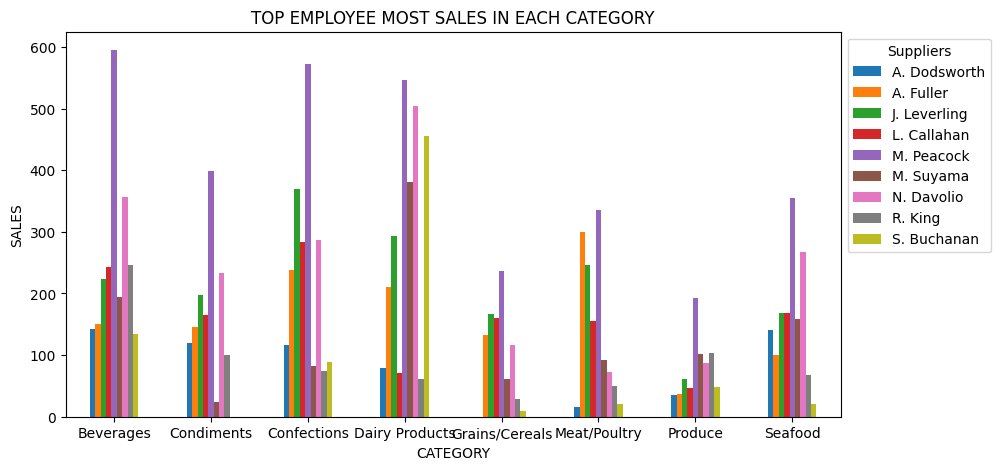

In [11]:
empSalesForCat = conn_db( query = '''
                                        SELECT  SUBSTR( e.FirstName, 1, 1 ) || ". " || e.LastName AS Employee,
                                        		c.CategoryName,
                                        		SUM(od.Quantity) AS SalesEmployee
                                          
                                        FROM [Employees] e
                                        JOIN [Orders] o ON o.EmployeeID = e.EmployeeID
                                        JOIN [OrderDetails] od ON od.OrderID = o.OrderID
                                        JOIN [Products] p ON p.ProductID = od.ProductID
                                        JOIN [Categories] c	ON c.CategoryID = p.CategoryID
                                        
                                        GROUP BY c.CategoryName, Employee
                                        ORDER BY SalesEmployee DESC
                                  ''',
                                  
                          columns = [ 'EMPLOYEE', 'CATEGORY', 'SALES' ] )

print("\n==[ MOST SALES OF THE EMPLOYEES FOR EACH CATEGORY ]==")
print( tabulate( empSalesForCat, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
p_table = empSalesForCat.pivot_table( index = "CATEGORY", columns = "EMPLOYEE", values = "SALES", 
                          aggfunc = "sum", fill_value = None )
p_table.plot( kind = "bar", figsize = ( 10, 5 ) )

plt.title( "TOP EMPLOYEE MOST SALES IN EACH CATEGORY" )
plt.xlabel( "CATEGORY" )
plt.ylabel( "SALES" )
plt.xticks( rotation = 0 )
plt.legend( title = "Suppliers", loc = "upper left", bbox_to_anchor = ( 1, 1 ) )
plt.show()

¨
 ## > 05. LESS PROFITABLE CATEGORY


==[ LESS PROFITABLE CATEGORY ]==
+----+----------------+----------------------------------+--------+--------+-------+----------+---------------+
|    |    CATEGORY    |             PRODUCT              | PRICE  |  COST  | SALES | REVENUES | PROFITABILITY |
+----+----------------+----------------------------------+--------+--------+-------+----------+---------------+
| 0  |   Beverages    |          Côte de Blaye           | 263.5  | 242.99 |  239  | 62977.0  |     7.78      |
| 1  |   Beverages    |         Chartreuse verte         |  18.0  | 13.58  |  266  |  4788.0  |     24.56     |
| 2  |   Beverages    |          Steeleye Stout          |  18.0  | 13.22  |  369  |  6642.0  |     26.56     |
| 3  |   Beverages    |           Ipoh Coffee            |  46.0  | 33.33  |  136  |  6256.0  |     27.54     |
| 4  |   Beverages    |          Outback Lager           |  15.0  | 10.62  |  164  |  2460.0  |     29.2      |
| 5  |   Beverages    |              Chang               |  19.0  | 13

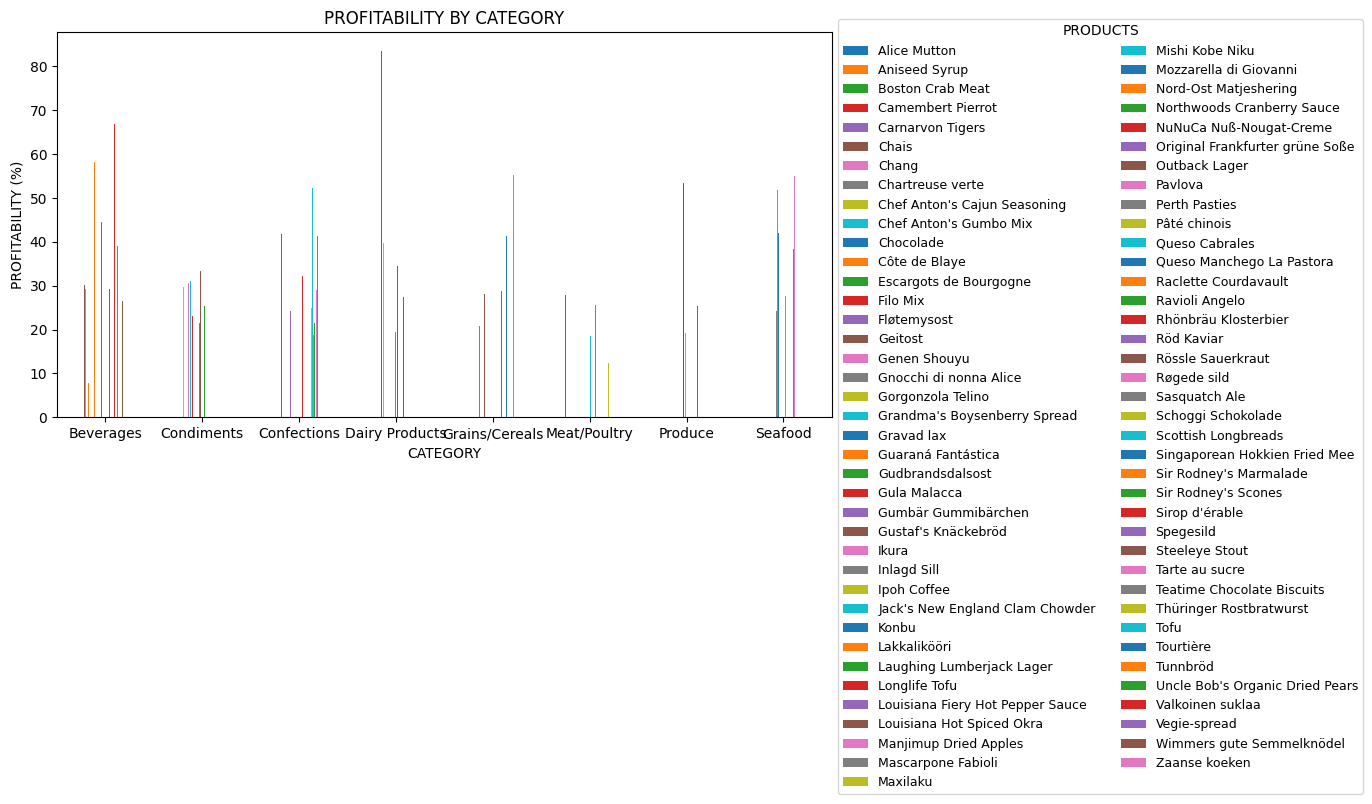

In [34]:
lessProfitCat = conn_db( query = '''
                                    SELECT  c.CategoryName,
                                    		p.ProductName,
                                    		Price, Cost,
                                    		SUM( od.Quantity ) AS Sales,
                                    		ROUND( SUM( od.Quantity )* Price ) AS Revenues,
                                    		ROUND( ( Price - Cost ) / Price * 100, 2 ) AS Profitability
                                          
                                    FROM [OrderDetails] od
                                    JOIN [Products] p 
                                        ON od.ProductID = p.ProductID
                                    JOIN [Categories] c 
                                        ON p.CategoryID = c.CategoryID 
                                        
                                    GROUP BY c.CategoryName, Profitability
                                    ORDER BY c.CategoryName, Profitability
                                  ''',
                                  
                          columns = [ 'CATEGORY', 'PRODUCT', 'PRICE', 'COST', 'SALES', 'REVENUES', 'PROFITABILITY' ] )

print("\n==[ LESS PROFITABLE CATEGORY ]==")
print( tabulate( lessProfitCat, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
p_table = lessProfitCat.pivot_table( index = "CATEGORY", columns = "PRODUCT", values = "PROFITABILITY", 
                                     aggfunc = "sum", fill_value = None )
p_table.plot( kind = "bar", figsize = ( 10, 5 ) )

plt.title( "PROFITABILITY BY CATEGORY" )
plt.xlabel( "CATEGORY" )
plt.ylabel( "PROFITABILITY (%)" )
plt.xticks( rotation = 0 )
plt.legend( title = "PRODUCTS", loc = "upper left", bbox_to_anchor = ( 1, 1.05 ), 
            fontsize = 9, ncol = 2 )
plt.show()

¨
 ## > 06. MOST PROFITABLE PRODUCTS


==[ MOST PROFITABLE PRODUCTS ]==
+---+----------------------+-------+-------+-------+----------+---------------+
|   |       PRODUCT        | PRICE | COST  | SALES | REVENUES | PROFITABILITY |
+---+----------------------+-------+-------+-------+----------+---------------+
| 0 |       Geitost        |  2.5  | 0.41  |  316  |  790.0   |     83.6      |
| 1 | Rhönbräu Klosterbier | 7.75  | 2.56  |  144  |  1116.0  |     66.97     |
| 2 |      Tourtière       | 7.45  | 3.02  |  280  |  2086.0  |     59.46     |
| 3 |     Pâté chinois     | 24.0  | 10.02 |  238  |  5712.0  |     58.25     |
| 4 |  Guaraná Fantástica  |  4.5  | 1.88  |  158  |  711.0   |     58.22     |
| 5 |       Filo Mix       |  7.0  | 2.98  |  48   |  336.0   |     57.43     |
| 6 |       Tunnbröd       |  9.0  | 4.02  |  165  |  1485.0  |     55.33     |
| 7 |     Røgede sild      |  9.5  | 4.28  |  15   |  143.0   |     54.95     |
| 8 |    Longlife Tofu     | 10.0  | 4.67  |  186  |  1860.0  |     53.3      |
| 9 | 

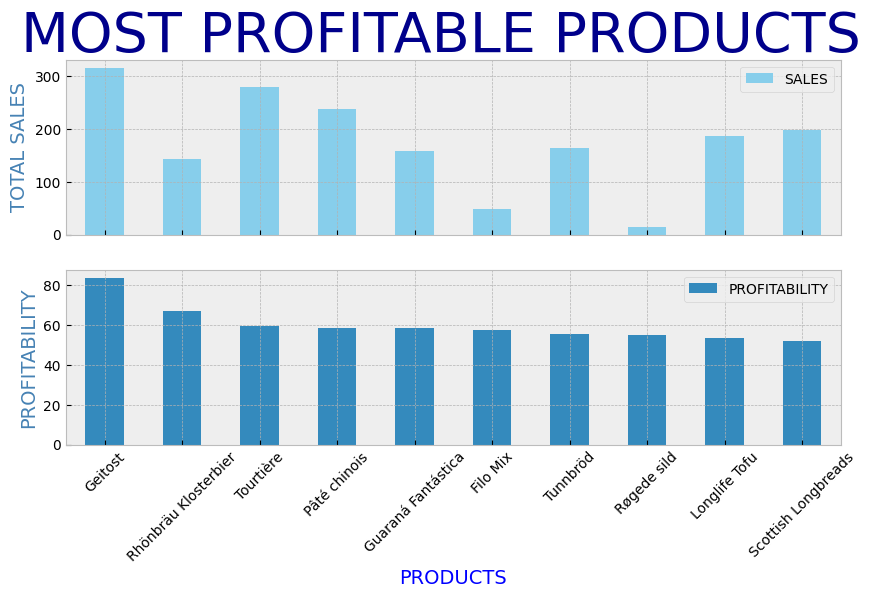

In [3]:
mostProfitableProd = conn_db( query = '''
                                        SELECT  p.ProductName,
                                        		Price, Cost,
                                        		SUM( od.Quantity ) AS Sales,
                                        		ROUND( SUM( od.Quantity )* Price ) AS Revenues,
                                        		ROUND( ( Price - Cost ) / Price * 100, 2 ) AS Profitability

                                        FROM [OrderDetails] od
                                        JOIN [Products] p 
                                            ON od.ProductID = p.ProductID

                                        GROUP BY p.ProductName, Profitability
                                        ORDER BY Profitability DESC
                                        LIMIT 10
                                      ''',
                                  
                              columns = [ 'PRODUCT', 'PRICE', 'COST', 'SALES', 'REVENUES', 'PROFITABILITY' ] )

print("\n==[ MOST PROFITABLE PRODUCTS ]==")
print( tabulate( mostProfitableProd, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.style.use( "bmh" )
fig, ( ax1, ax2 ) = plt.subplots( nrows = 2, ncols = 1, sharex = True )
plt.suptitle( "MOST PROFITABLE PRODUCTS", fontsize = 40, color = "darkblue" )

mostProfitableProd.plot( ax = ax1, kind = "bar", figsize = ( 10, 1 ), legend = True,
                         y = "SALES", color = "skyblue" )
ax1.set_xlabel( "PRODUCTS", fontsize = 14 )
ax1.set_ylabel( "TOTAL SALES", fontsize = 14, color = "steelblue"  )
plt.xticks()

mostProfitableProd.plot( ax = ax2, kind = "bar", figsize = ( 10, 5 ), legend = True,
                         x = "PRODUCT", y = "PROFITABILITY" )
ax2.set_xlabel( "PRODUCTS", fontsize = 14, color = "blue" )
ax2.set_ylabel( "PROFITABILITY", fontsize = 14, color = "steelblue" )
plt.xticks( rotation = 45 )

plt.show()

¨
 ## > 07. MONTHLY & YEAR SOLD PRODUCTS

In [4]:
prodSalesMmYy = conn_db( query = '''
                                    SELECT	CASE
			                                    WHEN OrderDate BETWEEN "1996-01-01" AND "1997-01-01" THEN "1996"
			                                    WHEN OrderDate BETWEEN "1997-01-01" AND "1998-01-01" THEN "1997"
		                                    END AS Year,
		                                    CASE
			                                    WHEN OrderDate BETWEEN "1996-07-01" AND "1996-08-01" THEN "July '96"
			                                    WHEN OrderDate BETWEEN "1996-08-01" AND "1996-09-01" THEN "August '96"
			                                    WHEN OrderDate BETWEEN "1996-09-01" AND "1996-10-01" THEN "September '96"
			                                    WHEN OrderDate BETWEEN "1996-10-01" AND "1996-11-01" THEN "October '96"
			                                    WHEN OrderDate BETWEEN "1996-11-01" AND "1996-12-01" THEN "November '96"
			                                    WHEN OrderDate BETWEEN "1996-12-01" AND "1997-01-01" THEN "December '96"
			                                    WHEN OrderDate BETWEEN "1997-01-01" AND "1997-02-01" THEN "January '97"
		                                    END AS Month,
		                                    p.ProductName, SUM(od.Quantity) AS ProductSales		
                                    FROM [Products] p
                                    JOIN [Orders] o ON od.OrderID = O.OrderID
                                    JOIN [OrderDetails] od ON p.ProductID = od.ProductID
                                    GROUP BY ProductName
                                    ORDER BY OrderDate
                                 ''',
                                 
                         columns = [ 'Year', 'Month', 'ProductName', 'ProductSales' ] )

print("\n==[ MONTH SALES & YEAR SALES BY PRODUCTS ]==")
print( tabulate( prodSalesMmYy, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB (pivot_table)
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
p_table_m = prodSalesMmYy.pivot_table( index = "MONTH", columns = "PRODUCT", values = "TOTAL SALES", 
                          			   aggfunc = "sum", fill_value = None )
p_table_m.plot( kind = "bar", figsize = ( 10, 5 ) )

plt.title( "TOP MONTH SALES PRODUCTS" )
plt.xlabel( "MONTH OF THE YEAR" )
plt.ylabel( "TOTAL SALES" )
plt.xticks( rotation = 0 )
plt.legend( title = "PRODUCTS", loc = "upper left", bbox_to_anchor = ( 1, 1.05 ), 
            fontsize = 9, ncol = 2  )
plt.show()


==[ MONTH SALES & YEAR SALES BY PRODUCTS ]==
+----+------+---------------+----------------------------------+--------------+
|    | Year |     Month     |           ProductName            | ProductSales |
+----+------+---------------+----------------------------------+--------------+
| 0  | 1996 |   July '96    |      Mozzarella di Giovanni      |     270      |
| 1  | 1996 |   July '96    |          Queso Cabrales          |     182      |
| 2  | 1996 |   July '96    |  Singaporean Hokkien Fried Mee   |      77      |
| 3  | 1996 |   July '96    |      Manjimup Dried Apples       |     163      |
| 4  | 1996 |   July '96    |               Tofu               |     152      |
| 5  | 1996 |   July '96    |       Gustaf's Knäckebröd        |      18      |
| 6  | 1996 |   July '96    | Jack's New England Clam Chowder  |     139      |
| 7  | 1996 |   July '96    | Louisiana Fiery Hot Pepper Sauce |     175      |
| 8  | 1996 |   July '96    |          Ravioli Angelo          |     168  

KeyError: 'TOTAL SALES'

¨
 ## > 08. BEST CUSTOMERS


==[ BEST CUSTOMERS ]==
+---+--------------------+--------------+----------+--------------+
|   |     CUSTOMERS      | TOTAL ORDERS | PURCHASE | AVG PURCHASE |
+---+--------------------+--------------+----------+--------------+
| 0 |   Roland Mendel    |      35      | 26942.0  |    769.0     |
| 1 |    Paula Wilson    |      22      | 12234.0  |    556.0     |
| 2 |  Patricia McKenna  |      21      | 10735.0  |    511.0     |
| 3 |    Horst Kloss     |      20      | 26009.0  |    1300.0    |
| 4 |   Jose Pavarotti   |      16      | 13524.0  |    845.0     |
| 5 |   Peter Franken    |      15      | 10175.0  |    678.0     |
| 6 |   Jean Fresnière   |      14      | 26375.0  |    1884.0    |
| 7 | Frédérique Citeaux |      13      | 14313.0  |    1101.0    |
| 8 |  Carlos González   |      13      |  4278.0  |    329.0     |
| 9 | Art Braunschweiger |      13      |  560.0   |     43.0     |
+---+--------------------+--------------+----------+--------------+



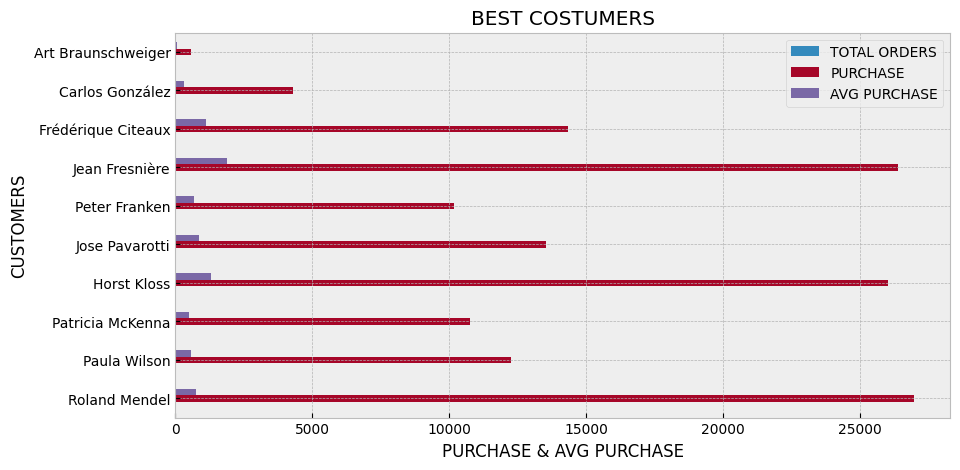

In [7]:
bestCustomers = conn_db( query = '''
                                        SELECT  c.ContactName, 
                                                COUNT( o.OrderID ) AS CustomerOrders,
                                                ROUND( SUM( od.Quantity ) * p.Price ) AS PurchaseExpenditure,
                                                ROUND( SUM( od.Quantity ) * p.Price / COUNT( o.OrderID ) ) AS AvgPurchase
                                        
                                        FROM [Customers] c
                                        JOIN [Orders] o 
                                                ON c.CustomerID = o.CustomerID
                                        JOIN [OrderDetails] od 
                                                ON o.OrderID = od.OrderID
                                        JOIN [Products] p
                                                ON od.ProductID = p.ProductID
                                        
                                        GROUP BY c.ContactName
                                        ORDER BY CustomerOrders DESC, AvgPurchase DESC
                                        LIMIT 10
                                 ''',
                                 
                         columns = [ 'CUSTOMERS', 'TOTAL ORDERS', 'PURCHASE', 'AVG PURCHASE' ] )

print("\n==[ BEST CUSTOMERS ]==")
print( tabulate( bestCustomers, headers = "keys", tablefmt= "pretty" ) )
print()


# GRÁFICA MATPLOTLIB
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
bestCustomers.plot( x = "CUSTOMERS", y = [ 'TOTAL ORDERS', 'PURCHASE', 'AVG PURCHASE' ],
                    kind = "barh", figsize = ( 10, 5 ), legend = True )
plt.title( "BEST COSTUMERS" )
plt.xlabel( "PURCHASE & AVG PURCHASE" )
plt.ylabel( "CUSTOMERS" )
plt.yticks( rotation = 0 )
plt.show()

¨
 ## > 09. TOP EMPLOYEE MONTH SALES


==[ TOP EMPLOYEES MONTH SALES ]==
+----+---------+--------------+-------------+
|    |  MONTH  |   EMPLOYEE   | TOTAL SALES |
+----+---------+--------------+-------------+
| 0  | 1996-10 |  M. Peacock  |     27      |
| 1  | 1996-12 |  N. Davolio  |     23      |
| 2  | 1997-01 |  M. Peacock  |     22      |
| 3  | 1996-07 |  M. Peacock  |     20      |
| 4  | 1997-01 | J. Leverling |     17      |
| 5  | 1996-08 | L. Callahan  |     16      |
| 6  | 1996-08 |  M. Peacock  |     16      |
| 7  | 1996-11 |  M. Peacock  |     16      |
| 8  | 1997-02 | J. Leverling |     14      |
| 9  | 1996-09 |  N. Davolio  |     13      |
| 10 | 1996-12 | L. Callahan  |     13      |
| 11 | 1997-01 | L. Callahan  |     13      |
| 12 | 1996-08 |  N. Davolio  |     12      |
| 13 | 1996-10 |   R. King    |     11      |
| 14 | 1996-11 |  N. Davolio  |     11      |
| 15 | 1996-12 |  M. Peacock  |     11      |
| 16 | 1996-09 |  A. Fuller   |     10      |
| 17 | 1996-12 |  M. Suyama   |     10      |

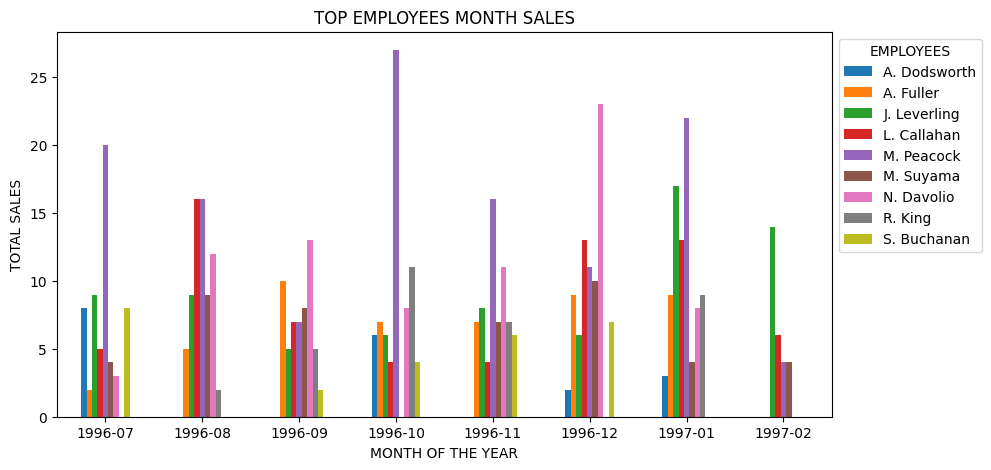

In [36]:
topEmpMonthSales = conn_db( query = '''
                                        SELECT	STRFTIME( '%Y-%m', o.OrderDate ) AS Month,
                                                SUBSTR( e.FirstName, 1, 1 ) || ". " || e.LastName AS Employee,
                                                COUNT(o.OrderID) AS TotalSales                                                 
                                        
                                        FROM [Employees] e
                                        JOIN [Orders] o ON e.EmployeeID = o.EmployeeID
                                        JOIN [OrderDetails] od ON od.OrderID = O.OrderID
                                        
                                        GROUP BY Month, Employee
                                        ORDER BY TotalSales DESC, Month
                                    ''',
                                 
                            columns = [ 'MONTH', 'EMPLOYEE', 'TOTAL SALES' ] )

print("\n==[ TOP EMPLOYEES MONTH SALES ]==")
print( tabulate( topEmpMonthSales, headers = "keys", tablefmt = "pretty" ) )


# GRÁFICA MATPLOTLIB (pivot_table)
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
p_table = topEmpMonthSales.pivot_table( index = "MONTH", columns = "EMPLOYEE", values = "TOTAL SALES", 
                          aggfunc = "sum", fill_value = None )
p_table.plot( kind = "bar", figsize = ( 10, 5 ) )

plt.title( "TOP EMPLOYEES MONTH SALES" )
plt.xlabel( "MONTH OF THE YEAR" )
plt.ylabel( "TOTAL SALES" )
plt.xticks( rotation = 0 )
plt.legend( title = "EMPLOYEES", loc = "upper left", bbox_to_anchor = ( 1, 1 ) )
plt.show()

¨
 ## > 10. CUSTOMER AVERAGE TICKET

¨
 ## > 11. MOST EFFICIENT EMPLOYEES

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

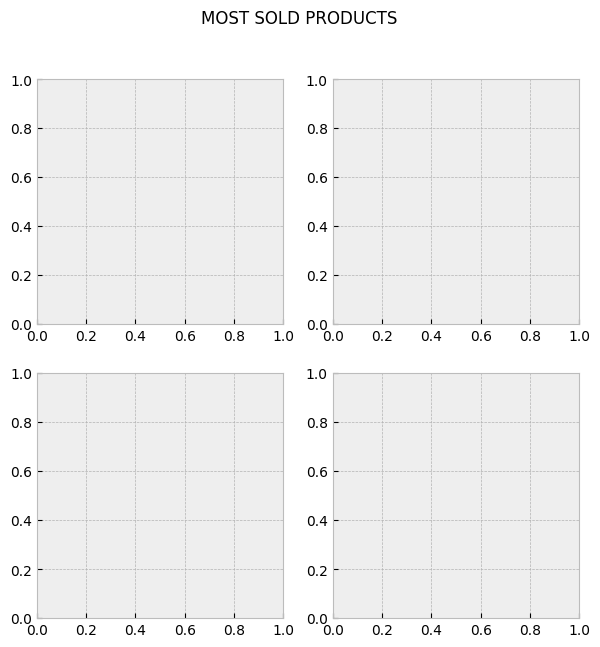

In [12]:
#"""
#PRUEBAS MATPLOT
fig, ( ax1, ax2 ) = plt.subplots( figsize = ( 7, 7 ), nrows=2, ncols=2 )
ax1, ax2

fig.suptitle( "MOST SOLD PRODUCTS" )
ax1.plot( ax1, ax2 )
ax1.set_xlabel
ax1.set_ylabel
ax1.plt( kind="bar" )

'''
plt.title( "TOP10 MOST SOLD PRODUCTS" )
plt.xlabel( "PRODUCTS" )
plt.ylabel( [ "SALES", "REVENUE" ] )
plt.xticks( rotation = 90 )
'''
#"""

In [35]:
print(plt.style.available)

# ??plt.xticks

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Signature: plt.xticks(ticks=None, labels=None, *, minor=False, **kwargs)
Source:   
def xticks(ticks=None, labels=None, *, minor=False, **kwargs):
    """
    Get or set the current tick locations and labels of the x-axis.

    Pass no arguments to return the current values without modifying them.

    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    minor : bool, default: False
        If ``False``, get/set the major ticks/labels; if ``True``, the minor
        ticks/labels.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.

    Returns
    -------
    locs
        The list of xtick locations.
    labels
        The list of xlabel `.Text` objects.

    Notes
    -----
    Calling this fu